## Problem Set 3: Neural Networks

### Overview
In this problem set, you'll explore the foundational concepts of neural networks, covering basic architecture, activation functions, forward propagation, regularization, and adaptive learning. You'll also complete coding exercises to implement neural network components and train a basic neural network. You will both complete this Python script (`ps3.ipynb`) and submit a LaTeX report (`ps3.tex` and `ps3.pdf`).

## 1. Basic Architecture of a Neural Network

A neural network is composed of layers of neurons: input layer, hidden layer(s), and an output layer. Each neuron receives inputs, processes them, and passes the result to the next layer.

In this section, you'll implement a basic 3-layer neural network structure.

In [6]:
import numpy as np

def initialize_parameters(input_size, hidden_size1, hidden_size2, output_size):

  
    np.random.seed(0)
    
    # Initialize weights and biases for first hidden layer
    W1 = np.random.randn(hidden_size1, input_size) * 0.01
    b1 = np.zeros((hidden_size1, 1))
    
    # Initialize weights and biases for second hidden layer
    W2 = np.random.randn(hidden_size2, hidden_size1) * 0.01
    b2 = np.zeros((hidden_size2, 1))
    
    # Initialize weights and biases for output layer
    W3 = np.random.randn(output_size, hidden_size2) * 0.01
    b3 = np.zeros((output_size, 1))
    
    return W1, b1, W2, b2, W3, b3

# Example usage
W1, b1, W2, b2, W3, b3 = initialize_parameters(3, 4, 4, 1)
print("W1:", W1)
print("b1:", b1)
print("W2:", W2)
print("b2:", b2)
print("W3:", W3)
print("b3:", b3)

W1: [[ 0.01764052  0.00400157  0.00978738]
 [ 0.02240893  0.01867558 -0.00977278]
 [ 0.00950088 -0.00151357 -0.00103219]
 [ 0.00410599  0.00144044  0.01454274]]
b1: [[0.]
 [0.]
 [0.]
 [0.]]
W2: [[ 0.00761038  0.00121675  0.00443863  0.00333674]
 [ 0.01494079 -0.00205158  0.00313068 -0.00854096]
 [-0.0255299   0.00653619  0.00864436 -0.00742165]
 [ 0.02269755 -0.01454366  0.00045759 -0.00187184]]
b2: [[0.]
 [0.]
 [0.]
 [0.]]
W3: [[0.01532779 0.01469359 0.00154947 0.00378163]]
b3: [[0.]]


## 2. Activation Functions


Activation functions introduce non-linearity into the network, allowing it to learn more complex patterns. Common functions include:

- **Sigmoid**: S-shaped curve, useful for binary classifications.
- **ReLU (Rectified Linear Unit)**: Outputs zero if input is negative, otherwise outputs the input.
- **Leaky ReLU**: Similar to ReLU but with a small gradient for negative inputs.

### Exercise:
Write functions for each activation function and plot them over a range of inputs.


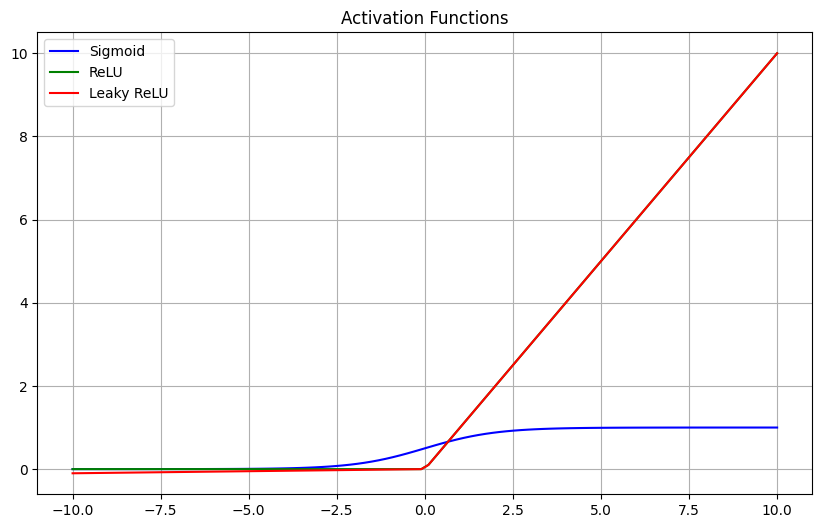

In [7]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt

# Define activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

# Generate plots
x_vals = np.linspace(-10, 10, 100)
plt.figure(figsize=(10, 6))
plt.plot(x_vals, sigmoid(x_vals), label="Sigmoid", color="blue")
plt.plot(x_vals, relu(x_vals), label="ReLU", color="green")
plt.plot(x_vals, leaky_relu(x_vals), label="Leaky ReLU", color="red")
plt.title("Activation Functions")
plt.legend()
plt.grid()
plt.show()



## 3. Forward Propagation

Forward propagation is the process of passing inputs through the network to generate an output.

### Exercise:
Implement forward propagation for a 3-layer neural network.

In [8]:
def forward_propagation(X, W1, b1, W2, b2, W3, b3):
 
    # First hidden layer
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    
    # Second hidden layer
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    
    # Output layer
    Z3 = np.dot(W3, A2) + b3
    return Z3  


def relu(Z):
    return np.maximum(0, Z)

# Example usage with random input
X = np.random.randn(3, 1)
output = forward_propagation(X, W1, b1, W2, b2, W3, b3)
print("Output of forward propagation:", output)

Output of forward propagation: [[0.]]


## 4. Overfitting and Regularization

Overfitting occurs when a model learns the noise in the training data rather than the actual pattern. Regularization helps control this.

Common techniques include:

- **L2 Regularization**: Adds a penalty based on the sum of squared weights.
- **Dropout**: Randomly ignores some neurons during training.

### Exercise:
Implement L2 regularization in the loss calculation.

In [9]:
def compute_loss_with_l2(Y, Y_hat, W1, W2, W3, lambd=0.1):
   
 
    m = Y.shape[1]
    
    # Compute MSE loss
    mse_loss = np.mean((Y - Y_hat) ** 2)
    
   
    l2_penalty = (lambd / (2 * m)) * (
        np.sum(np.square(W1)) + 
        np.sum(np.square(W2)) + 
        np.sum(np.square(W3))
    )
    
    # Return total loss
    return mse_loss + l2_penalty

# Example usage
Y = np.array([[1]])
Y_hat = np.array([[0.8]])
loss = compute_loss_with_l2(Y, Y_hat, W1, W2, W3)
print("Loss with L2 regularization:", loss)


loss_higher_reg = compute_loss_with_l2(Y, Y_hat, W1, W2, W3, lambd=0.5)
print("Loss with higher regularization:", loss_higher_reg)

Loss with L2 regularization: 0.040205808133493275
Loss with higher regularization: 0.04102904066746646


## 5. Training a Neural Network

Training involves adjusting the weights and biases to minimize the loss. A popular method is gradient descent.

### Exercise:
Implement a simple gradient descent loop to train the neural network.

In [11]:
import numpy as np

def gradient_descent(weights, biases, grad_weights, grad_biases, learning_rate):
    """
    Simple gradient descent update for weights and biases
    """
    weights = weights - learning_rate * grad_weights
    biases = biases - learning_rate * grad_biases
    return weights, biases

# Now your training loop should work with these functions
for i in range(10):  # 10 iterations
    # Forward propagation
    Z1 = np.dot(W1, X) + b1
    A1 = np.maximum(0, Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = np.maximum(0, Z2)
    Z3 = np.dot(W3, A2) + b3
    
    # Calculate loss
    m = X.shape[1]
    loss = compute_loss_with_l2(Y, Z3, W1, W2, W3)
    print(f"Iteration {i+1}, Loss: {loss}")
    
    # Calculate gradients
    grad_W1, grad_b1 = calculate_gradients_layer1(X, Y, W1, b1, W2, b2, W3, b3, Z1, A1, Z2, A2, Z3, m)
    grad_W2, grad_b2 = calculate_gradients_layer2(Y, W3, b3, Z2, A1, A2, Z3, m)
    grad_W3, grad_b3 = calculate_gradients_layer3(Y, A2, Z3, m)
    
    # Update parameters using gradient descent
    W1, b1 = gradient_descent(W1, b1, grad_W1, grad_b1, learning_rate)
    W2, b2 = gradient_descent(W2, b2, grad_W2, grad_b2, learning_rate)
    W3, b3 = gradient_descent(W3, b3, grad_W3, grad_b3, learning_rate)

Iteration 1, Loss: 1.0002058081334932
Iteration 2, Loss: 0.9803058081334932
Iteration 3, Loss: 0.9608018181334932
Iteration 4, Loss: 0.9416859575344932
Iteration 5, Loss: 0.9229505025614132
Iteration 6, Loss: 0.9045878831422978
Iteration 7, Loss: 0.8865906798496225
Iteration 8, Loss: 0.8689516209024716
Iteration 9, Loss: 0.8516635792283688
Iteration 10, Loss: 0.834719569583581


## 6. Adaptive Learning Rates


Adaptive learning rate methods, like Adam, adjust the learning rate based on past gradients, improving training stability.

### Exercise:
Implement a simple version of the Adam optimizer for gradient descent.

In [13]:
import numpy as np

# Adam Optimizer
def adam_optimizer(weights, grads, m, v, t, lr=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
    m = beta1 * m + (1 - beta1) * grads
    v = beta2 * v + (1 - beta2) * (grads ** 2)
    m_hat = m / (1 - beta1 ** t)
    v_hat = v / (1 - beta2 ** t)
    weights -= lr * m_hat / (np.sqrt(v_hat) + epsilon)
    return weights, m, v

# Initialize Adam parameters
m_W1, v_W1 = np.zeros_like(W1), np.zeros_like(W1)
m_b1, v_b1 = np.zeros_like(b1), np.zeros_like(b1)
m_W2, v_W2 = np.zeros_like(W2), np.zeros_like(W2)
m_b2, v_b2 = np.zeros_like(b2), np.zeros_like(b2)
m_W3, v_W3 = np.zeros_like(W3), np.zeros_like(W3)
m_b3, v_b3 = np.zeros_like(b3), np.zeros_like(b3)

# Training loop
t = 1
W1, m_W1, v_W1 = adam_optimizer(W1, grad_W1, m_W1, v_W1, t)
b1, m_b1, v_b1 = adam_optimizer(b1, grad_b1, m_b1, v_b1, t)
W2, m_W2, v_W2 = adam_optimizer(W2, grad_W2, m_W2, v_W2, t)
b2, m_b2, v_b2 = adam_optimizer(b2, grad_b2, m_b2, v_b2, t)
W3, m_W3, v_W3 = adam_optimizer(W3, grad_W3, m_W3, v_W3, t)
b3, m_b3, v_b3 = adam_optimizer(b3, grad_b3, m_b3, v_b3, t)